### The Aperiodic Component

In the last notebook we saw that we can distinguish spurious and true PAC based on non-sinusoidal characteristics of the signal such as the symmetry and amplitudes of peaks. We also saw that the distributions of the aperiodic component of the spectral power density differ for both groups. 

In this notebook we will further investigate the role of the aperiodic component

### Imports & Load Data


In [1]:
import os 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
# Set directory 
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab')

# load data
features_df = pd.read_csv('features_df.csv', sep=',')
features_df_nopac = pd.read_csv('features_df_nopac.csv', sep=',')

### Relationship between Background Exponential and Background Offset

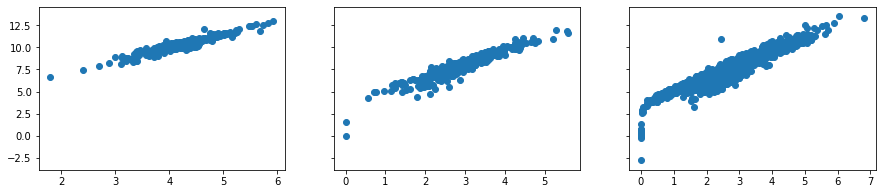

In [3]:
# plot for both the PAC and not PAC dataframes
fig, axs = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

axs[0].scatter(features_df[features_df['Clusters']==0]['backgr_exp'], 
               features_df[features_df['Clusters']==0]['backgr_offset']);

axs[1].scatter(features_df[features_df['Clusters']==1]['backgr_exp'], 
               features_df[features_df['Clusters']==1]['backgr_offset']);
axs[2].scatter(features_df_nopac['backgr_exp_nopac'], features_df_nopac['backgr_offset_nopac']);

<div class="alert alert-warning">
Because both measures highly correlate, for now we focus on the background exponential
</div>

### Difference in Distributions

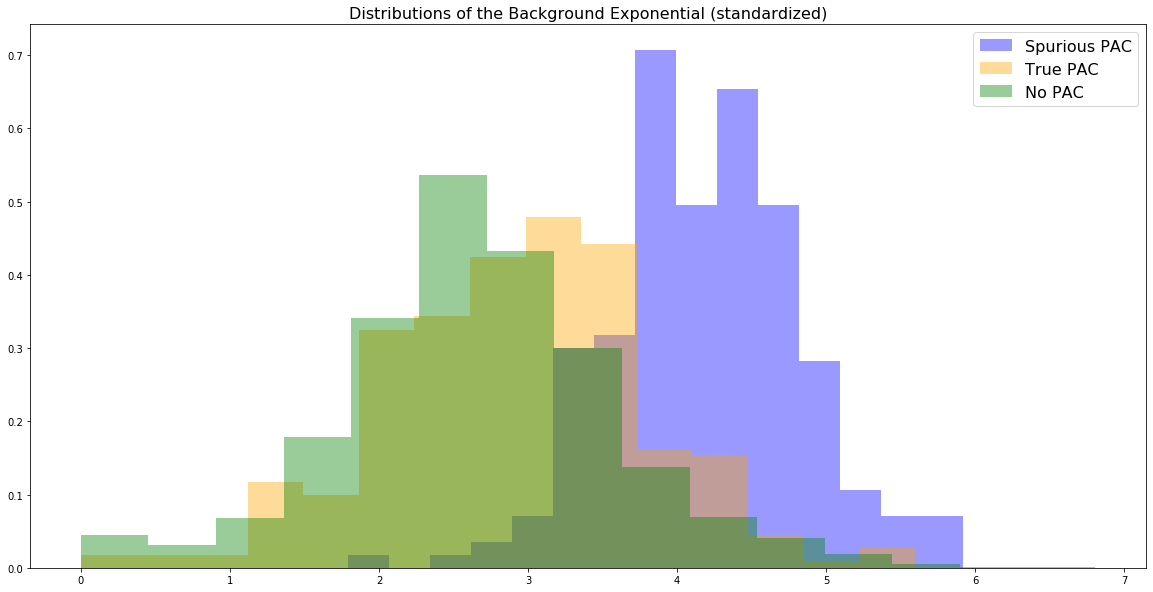

In [4]:
# standardize distributions because 'no PAC' has way more
kwargs = dict(histtype='stepfilled', alpha=0.4, density=True, bins=15)

plt.figure(figsize=(20,10))
plt.hist(features_df[features_df['Clusters']==0]['backgr_exp'], color='blue', label='Spurious PAC', **kwargs);
plt.hist(features_df[features_df['Clusters']==1]['backgr_exp'], color='orange', label='True PAC', **kwargs);
plt.hist(features_df_nopac['backgr_exp_nopac'], color='green', label='No PAC', **kwargs);

plt.title('Distributions of the Background Exponential (standardized)', fontsize=16)
plt.legend(fontsize=16)

### Predicting PAC values with Aperiodic Component

In [5]:
# transform to SKlearn for linear regressions

# reshape pac_values
pac_values_clus0 = features_df[features_df['Clusters']==0]['pac_values'].values.reshape(-1,1)
pac_values_clus1 = features_df[features_df['Clusters']==1]['pac_values'].values.reshape(-1,1)
pac_values_nopac = features_df_nopac['pac_values_nopac'].values.reshape(-1,1)

# reshape backgr_exp
backgr_exp_clus0 = features_df[features_df['Clusters']==0]['backgr_exp'].values.reshape(-1,1)
backgr_exp_clus1 = features_df[features_df['Clusters']==1]['backgr_exp'].values.reshape(-1,1)
backgr_exp_nopac = features_df_nopac['backgr_exp_nopac'].values.reshape(-1,1)

# Reshape Rho values
pac_rhos_clus0 = features_df[features_df['Clusters']==0]['pac_rhos'].values.reshape(-1,1)
pac_rhos_clus1 = features_df[features_df['Clusters']==1]['pac_rhos'].values.reshape(-1,1)
pac_rhos_nopac = features_df_nopac['pac_rhos_nopac'].values.reshape(-1,1)

# reshape resamp_zvals
resamp_zvals_clus0 = features_df[features_df['Clusters']==0]['resamp_zvals'].values.reshape(-1,1)
resamp_zvals_clus1 = features_df[features_df['Clusters']==1]['resamp_zvals'].values.reshape(-1,1)
resamp_zvals_nopac = features_df_nopac['resamp_zvals_nopac'].values.reshape(-1,1)

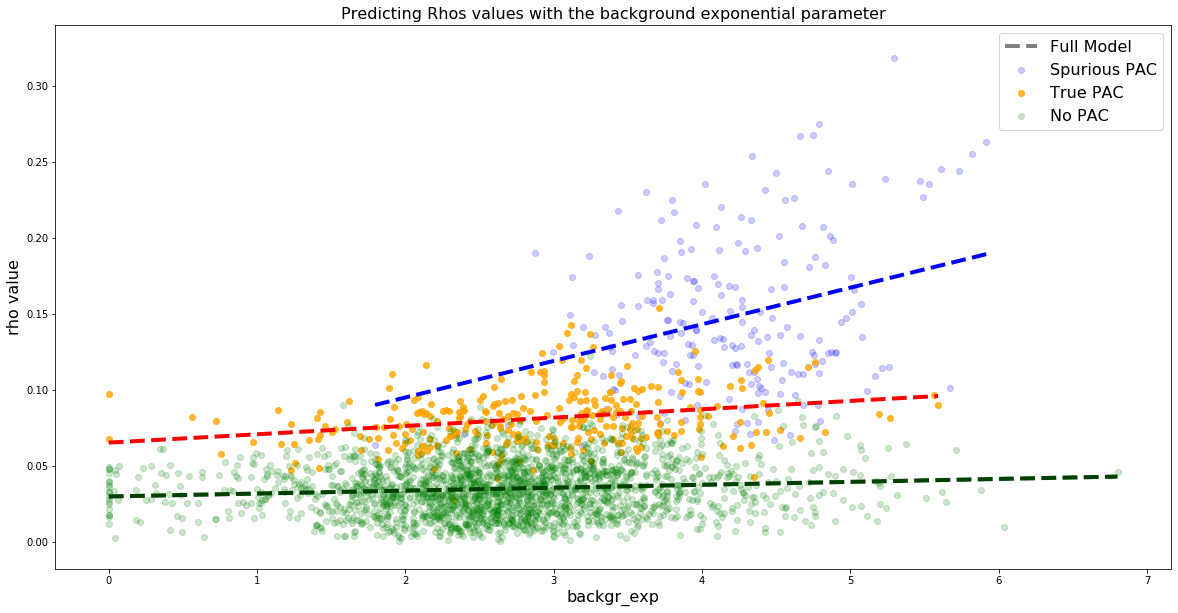

In [20]:
plt.figure(figsize=(20,10))

# Cluster 0: scatter + linear regression
plt.scatter(features_df[features_df['Clusters']==0]['backgr_exp'],
            features_df[features_df['Clusters']==0]['pac_rhos'],
           color='blue', alpha =.2, label='Spurious PAC')

reg1 = linear_model.LinearRegression()
reg1.fit(backgr_exp_clus0, pac_rhos_clus0)
xs = np.arange(min(backgr_exp_clus0), max(backgr_exp_clus0),0.01)
ys = reg1.intercept_[0] + reg1.coef_[0][0] * xs
plt.plot(xs, ys, '--b', linewidth=4, alpha=1)

# Cluster 1: scatter + linear regression
plt.scatter(features_df[features_df['Clusters']==1]['backgr_exp'],
            features_df[features_df['Clusters']==1]['pac_rhos'],
           color='orange', alpha =.8, label='True PAC')

reg2 = linear_model.LinearRegression()
reg2.fit(backgr_exp_clus1, pac_rhos_clus1)
xs = np.arange(min(backgr_exp_clus1), max(backgr_exp_clus1),0.01)
ys = reg2.intercept_[0] + reg2.coef_[0][0] * xs
plt.plot(xs, ys, '--r', linewidth=4, alpha=1)

# No PAC: scatter + linear regression
plt.scatter(features_df_nopac['backgr_exp_nopac'],
            features_df_nopac['pac_rhos_nopac'],
           color='green', alpha =.2, label='No PAC')

reg3 = linear_model.LinearRegression()
reg3.fit(backgr_exp_nopac, pac_rhos_nopac)
xs = np.arange(min(backgr_exp_nopac), max(backgr_exp_nopac),0.01)
ys = reg3.intercept_[0] + reg3.coef_[0][0] * xs
plt.plot(xs, ys, '--g', linewidth=4, alpha=1)

# Regression model on all combined
# concatenate the three groups and reshape
pac_rhos_comb = np.reshape(np.concatenate((pac_rhos_clus0, pac_rhos_clus1, pac_rhos_nopac), axis=None), [-1, 1])
backgr_exp_comb = np.reshape(np.concatenate((backgr_exp_clus0, backgr_exp_clus1, backgr_exp_nopac), axis=None), [-1, 1])

reg4= linear_model.LinearRegression()
reg4.fit(backgr_exp_comb, pac_rhos_comb)
xs = np.arange(min(backgr_exp_comb), max(backgr_exp_comb),0.01)
ys = reg3.intercept_[0] + reg3.coef_[0][0] * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Full Model', alpha=.5)


plt.title('Predicting Rhos values with the background exponential parameter', fontsize=16)
plt.xlabel('backgr_exp', fontsize=16)
plt.ylabel('rho value', fontsize=16)
plt.legend(fontsize=16)
plt.show()

<div class="alert alert-warning">
We cannot really include the blue dots (cluster 1) into the analysis, because this is the cluster that is affected by non-sinusoidal characteristics. 
    <br><br>
There is difference between the groups, and also the full model (which almost fully has the same coefficient as the No PAC, because this group has a lot of data) shows an increasing rho value for increasing (so steeper PSD background), but the effect probably not as big as you might expect
</div>

### Same for resampled Z values

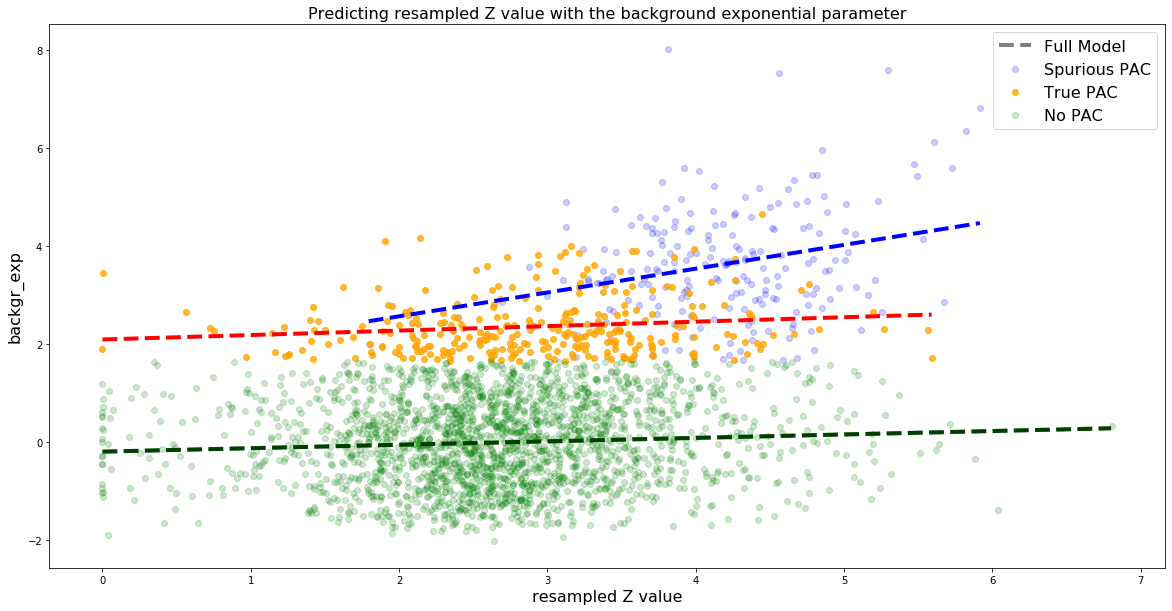

In [19]:
plt.figure(figsize=(20,10))

# Cluster 0: scatter + linear regression
plt.scatter(features_df[features_df['Clusters']==0]['backgr_exp'],
            features_df[features_df['Clusters']==0]['resamp_zvals'],
           color='blue', alpha =.2, label='Spurious PAC')

reg1 = linear_model.LinearRegression()
reg1.fit(backgr_exp_clus0, resamp_zvals_clus0)
xs = np.arange(min(backgr_exp_clus0), max(backgr_exp_clus0),0.01)
ys = reg1.intercept_[0] + reg1.coef_[0][0] * xs
plt.plot(xs, ys, '--b', linewidth=4, alpha=1)

# Cluster 1: scatter + linear regression
plt.scatter(features_df[features_df['Clusters']==1]['backgr_exp'],
            features_df[features_df['Clusters']==1]['resamp_zvals'],
           color='orange', alpha =.8, label='True PAC')

reg2 = linear_model.LinearRegression()
reg2.fit(backgr_exp_clus1, resamp_zvals_clus1, )
xs = np.arange(min(backgr_exp_clus1), max(backgr_exp_clus1),0.01)
ys = reg2.intercept_[0] + reg2.coef_[0][0] * xs
plt.plot(xs, ys, '--r', linewidth=4, alpha=1)

# No PAC: scatter + linear regression
plt.scatter(features_df_nopac['backgr_exp_nopac'],
            features_df_nopac['resamp_zvals_nopac'],
           color='green', alpha =.2, label='No PAC')

reg3 = linear_model.LinearRegression()
reg3.fit(backgr_exp_nopac, resamp_zvals_nopac)
xs = np.arange(min(backgr_exp_nopac), max(backgr_exp_nopac),0.01)
ys = reg3.intercept_[0] + reg3.coef_[0][0] * xs
plt.plot(xs, ys, '--g', linewidth=4, alpha=1)

# Regression model on all combined
# concatenate the three groups and reshape
resamp_zvals_comb = np.reshape(np.concatenate((resamp_zvals_clus0, resamp_zvals_clus1, resamp_zvals_nopac), axis=None), [-1, 1])
backgr_exp_comb = np.reshape(np.concatenate((backgr_exp_clus0, backgr_exp_clus1, backgr_exp_nopac), axis=None), [-1, 1])

reg4= linear_model.LinearRegression()
reg4.fit(backgr_exp_comb, resamp_zvals_comb)
xs = np.arange(min(backgr_exp_comb), max(backgr_exp_comb),0.01)
ys = reg3.intercept_[0] + reg3.coef_[0][0] * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Full Model', alpha=0.5)

plt.title('Predicting resampled Z value with the background exponential parameter', fontsize=16)
plt.xlabel('resampled Z value', fontsize=16)
plt.ylabel('backgr_exp', fontsize=16)
plt.legend(fontsize=16)
plt.show()